In [1]:
from metrics import (
    SquaredError, 
    
    FunctionClassError, 
    FCErrorQuadrants,
    FCErrorOrthogonal,
    FCErrorSeenPoints,
)
from metrics.utils import post_process, average_evals, plot_comparison_2_models, load_model, compare_2_models_multiple_training_runs
from function_classes.wrappers import (
    ScaledXRegression,
    ScaledYRegression,
    NoisyXRegression,
    NoisyYRegression,
)

from models.linear import LeastSquaresModel, LassoModel
from models.zero_model import ZeroModel

from models.transformer import GPT2, Llama

from function_classes.linear import LinearRegression, SparseLinearRegression

import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
import torch

/opt/conda/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/conda/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
B_SIZE, SEQ_LEN, X_DIM, Y_DIM = 512, 41, 20, 1
X_SHAPE = torch.Size([B_SIZE, SEQ_LEN, X_DIM])
Y_SHAPE = torch.Size([B_SIZE, SEQ_LEN, Y_DIM])

MODELS = [LeastSquaresModel(x_dim=X_DIM), ZeroModel(x_dim=X_DIM)]#[LassoModel(alpha=0.01, x_dim=X_DIM), LassoModel(alpha=0.02, x_dim=X_DIM), LassoModel(alpha=0.04, x_dim=X_DIM), LassoModel(alpha=0.08, x_dim=X_DIM)]

SCALES: list[float] = [0.125, 0.25, 0.5, 2., 4., 8.]
NOISE_LEVELS: list[float] = [0.0625, 0.125, 0.25, 0.5, 1.]

METRIC = SquaredError()

In [3]:
x_dist = MultivariateNormal(torch.zeros(X_SHAPE), torch.eye(X_DIM)) #batch size, sequence_length, x_dim

base_fc = SparseLinearRegression(3, x_dist, y_dim=Y_DIM)

bench = FunctionClassError(METRIC, function_class=base_fc)

1024it [10:03,  1.70it/s]
1024it [10:03,  1.70it/s]
1024it [10:03,  1.70it/s]
1024it [10:03,  1.70it/s]


tensor([[2.9926],
        [2.8493],
        [2.6625],
        [2.4048],
        [2.1008],
        [1.7847],
        [1.4800],
        [1.2080],
        [0.9743],
        [0.7680],
        [0.6128],
        [0.4810],
        [0.3831],
        [0.3014],
        [0.2425],
        [0.1938],
        [0.1583],
        [0.1302],
        [0.1080],
        [0.0908],
        [0.0777],
        [0.0671],
        [0.0588],
        [0.0517],
        [0.0465],
        [0.0415],
        [0.0380],
        [0.0352],
        [0.0327],
        [0.0307],
        [0.0289],
        [0.0278],
        [0.0264],
        [0.0254],
        [0.0244],
        [0.0237],
        [0.0232],
        [0.0224],
        [0.0222],
        [0.0217],
        [0.0212]])
tensor([[ 0.0014],
        [ 0.0042],
        [ 0.0032],
        [-0.0022],
        [-0.0110],
        [-0.0201],
        [-0.0286],
        [-0.0367],
        [-0.0301],
        [-0.0315],
        [-0.0239],
        [-0.0185],
        [-0.0130],
        [-0.00

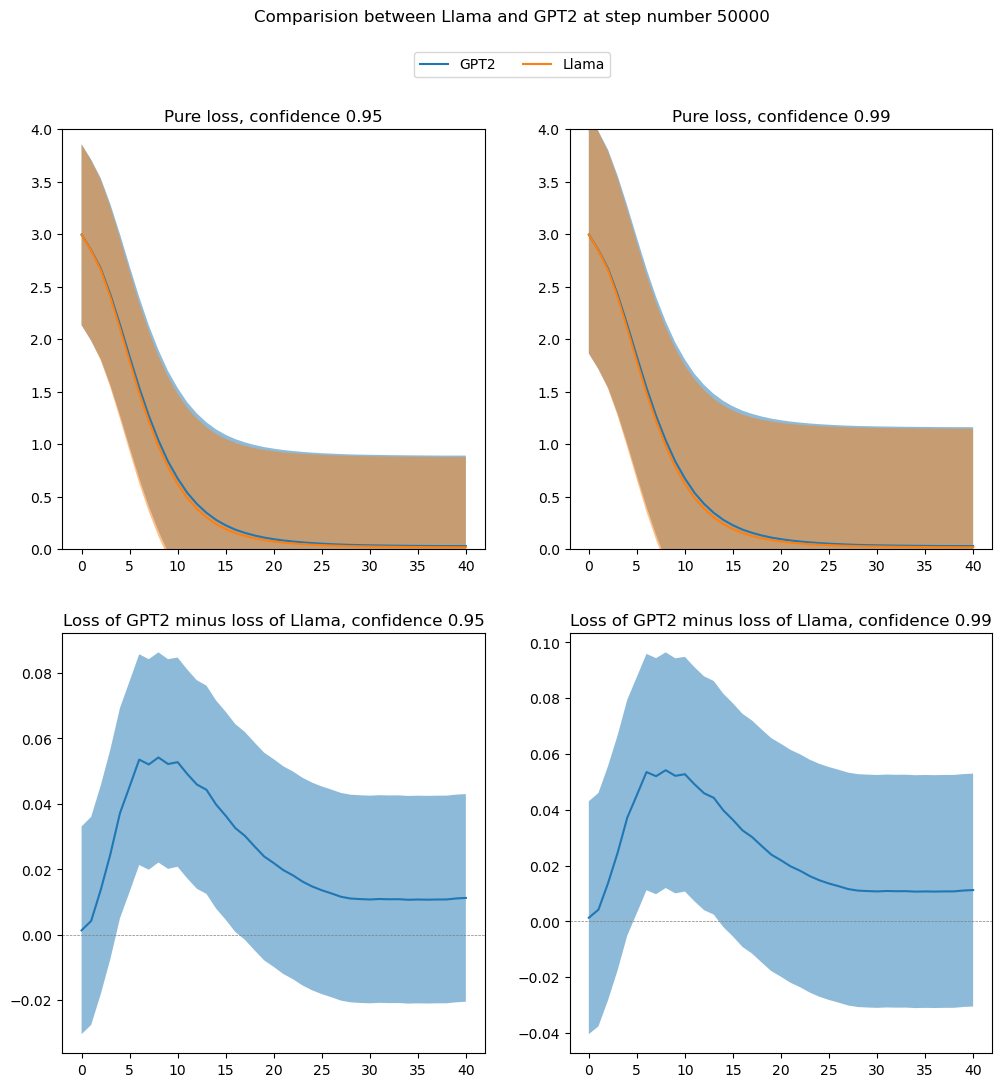

1024it [10:10,  1.68it/s]
1024it [10:09,  1.68it/s]
1024it [10:09,  1.68it/s]
1024it [10:09,  1.68it/s]


tensor([[2.9832],
        [2.8437],
        [2.6378],
        [2.3672],
        [2.0256],
        [1.6884],
        [1.3608],
        [1.0754],
        [0.8369],
        [0.6385],
        [0.4852],
        [0.3647],
        [0.2744],
        [0.2080],
        [0.1588],
        [0.1239],
        [0.0969],
        [0.0778],
        [0.0642],
        [0.0534],
        [0.0449],
        [0.0386],
        [0.0338],
        [0.0297],
        [0.0267],
        [0.0240],
        [0.0216],
        [0.0198],
        [0.0182],
        [0.0168],
        [0.0158],
        [0.0148],
        [0.0142],
        [0.0133],
        [0.0128],
        [0.0123],
        [0.0117],
        [0.0114],
        [0.0109],
        [0.0108],
        [0.0104]])
tensor([[-3.1627e-03],
        [ 5.8955e-04],
        [ 1.6980e-03],
        [-3.0525e-03],
        [-5.9162e-03],
        [-1.5382e-02],
        [-2.0021e-02],
        [-2.6910e-02],
        [-2.8840e-02],
        [-3.1161e-02],
        [-2.7054e-02],
        

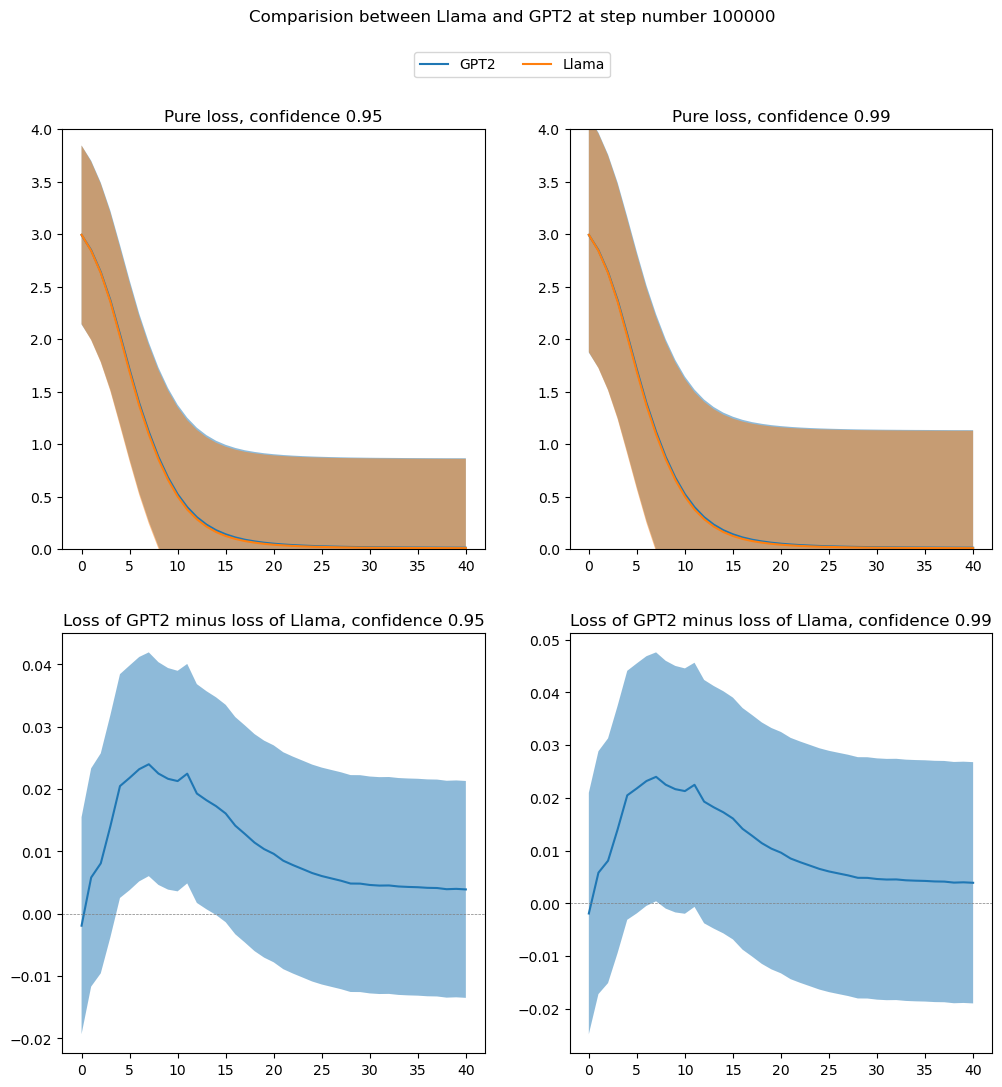

1024it [10:09,  1.68it/s]
1024it [10:10,  1.68it/s]
1024it [10:10,  1.68it/s]
1024it [10:10,  1.68it/s]


tensor([[3.0068],
        [2.8423],
        [2.6272],
        [2.3321],
        [1.9897],
        [1.6470],
        [1.3100],
        [1.0299],
        [0.7819],
        [0.5907],
        [0.4342],
        [0.3228],
        [0.2392],
        [0.1725],
        [0.1302],
        [0.1000],
        [0.0772],
        [0.0608],
        [0.0492],
        [0.0399],
        [0.0338],
        [0.0286],
        [0.0245],
        [0.0215],
        [0.0190],
        [0.0168],
        [0.0153],
        [0.0141],
        [0.0130],
        [0.0122],
        [0.0114],
        [0.0109],
        [0.0103],
        [0.0100],
        [0.0096],
        [0.0093],
        [0.0090],
        [0.0089],
        [0.0087],
        [0.0086],
        [0.0083]])
tensor([[-6.5299e-05],
        [ 4.5459e-03],
        [ 4.1109e-03],
        [ 3.3363e-04],
        [-4.3403e-03],
        [-5.7379e-03],
        [-7.6050e-03],
        [-9.5939e-03],
        [-1.2927e-02],
        [-6.7541e-03],
        [-8.0921e-03],
        

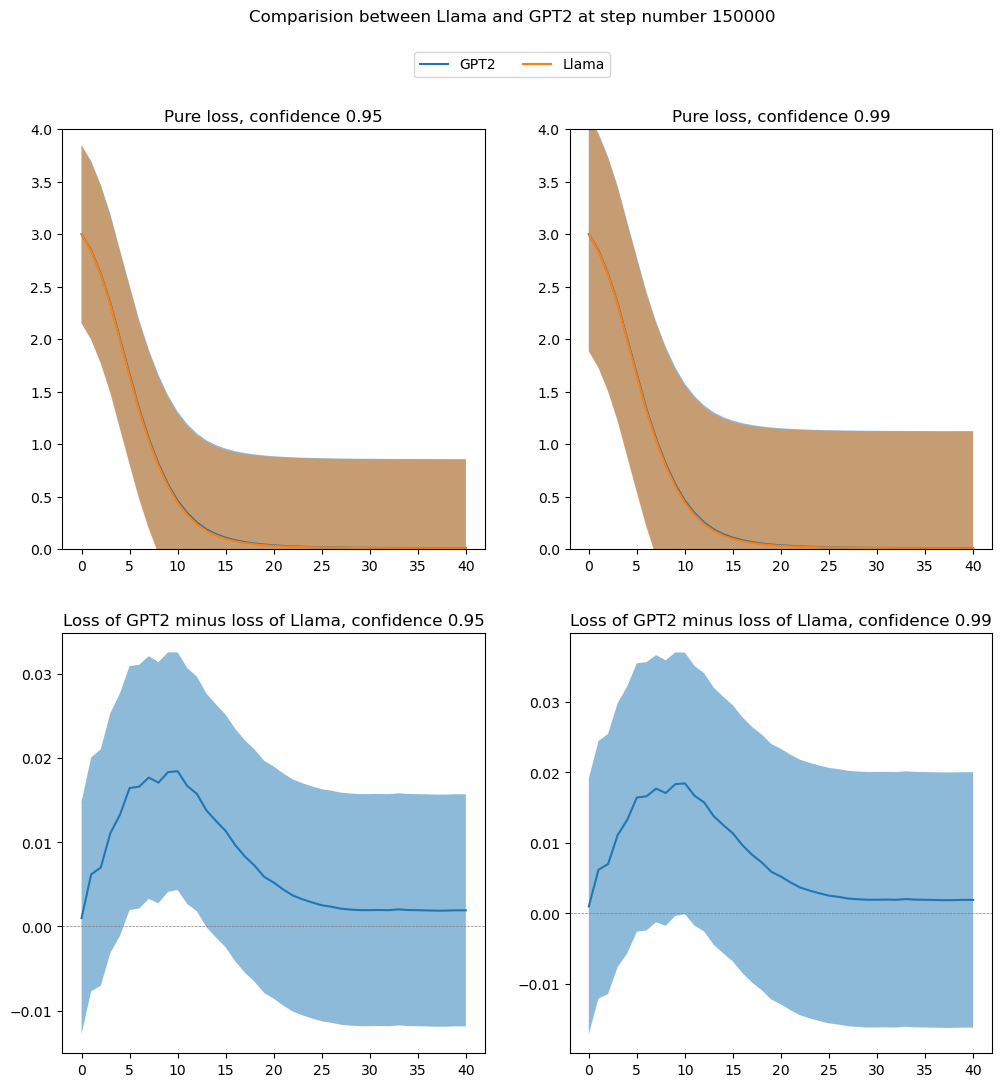

1024it [10:11,  1.68it/s]
744it [07:24,  1.68it/s]

KeyboardInterrupt: 

In [5]:
for size in [50_000, 100_000, 150_000, 200_000]:
    file_paths_1=[]
    file_paths_2=[]

    models=[GPT2(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8), Llama(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8)]

    for j in range(8, 12):
        file_paths_1.append(f"stored_models/Sparse_linear/gpt2/checkpoint_"+str(size)+ " ("+ str(j+4)+")")
        file_paths_2.append(f"stored_models/Sparse_linear/Llama/checkpoint_"+str(size)+ " ("+ str(j)+")")

    summaries, diff=compare_2_models_multiple_training_runs(file_paths_1, file_paths_2, models, ["GPT_2", "Llama"], bench, 1024)
    plot_comparison_2_models(names=["GPT2", "Llama"], post_processed_diff=diff, post_processed_errs=summaries, title=f"Comparision between Llama and GPT2 at step number {size}", ylim=[0, 4])
    #print(diff["training_confidence_0.95_lower"], diff["confidence_0.95_lower"])

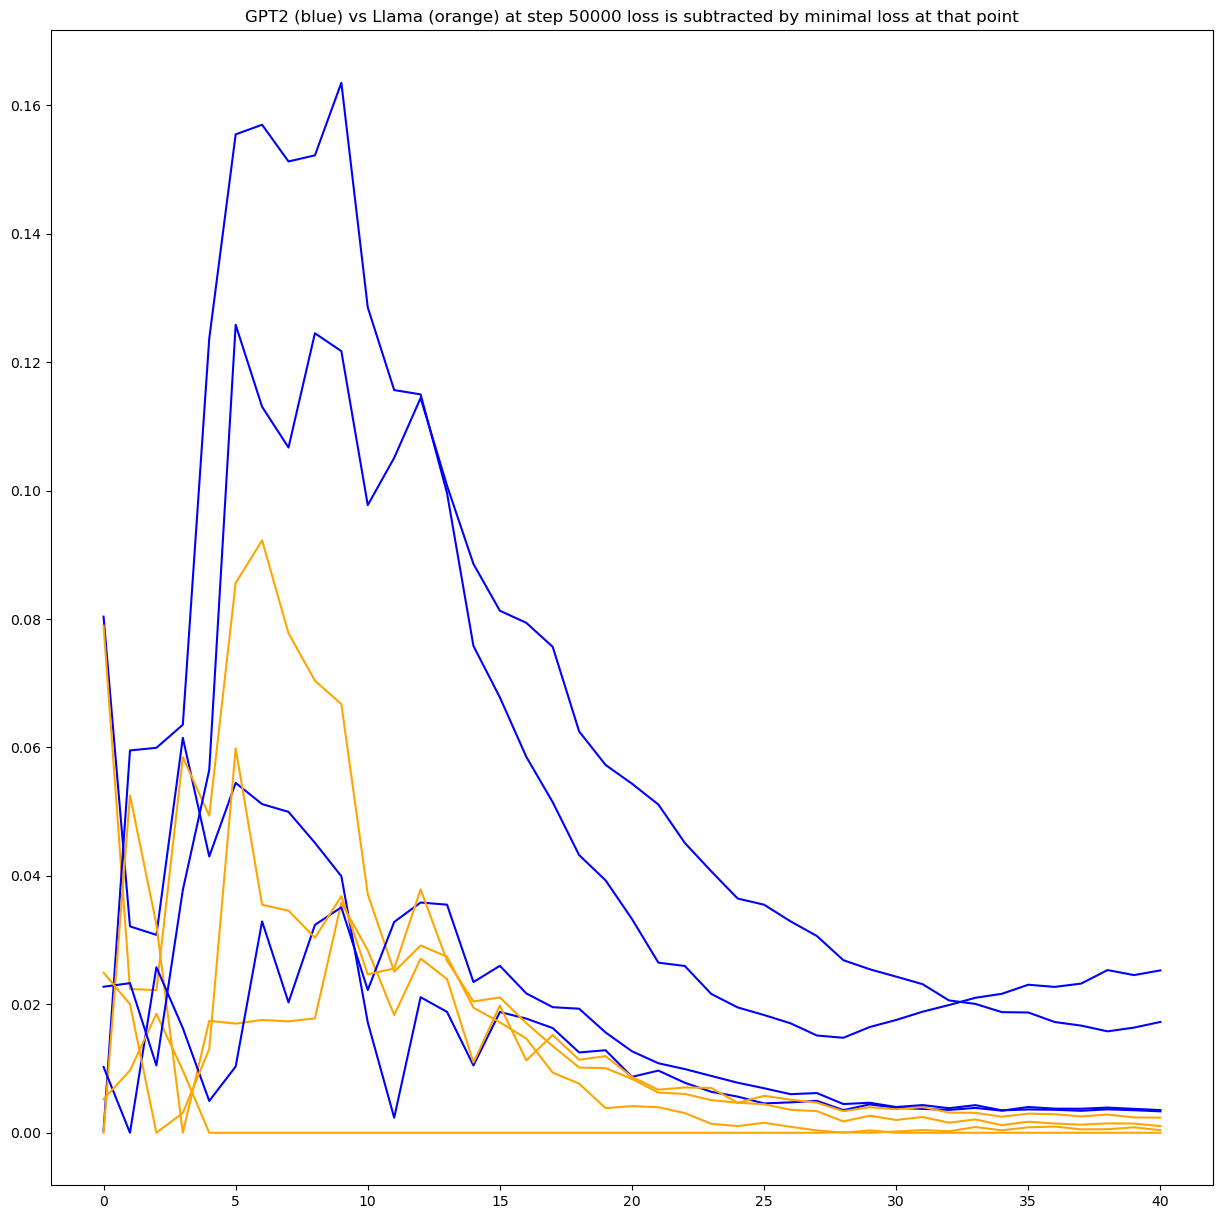

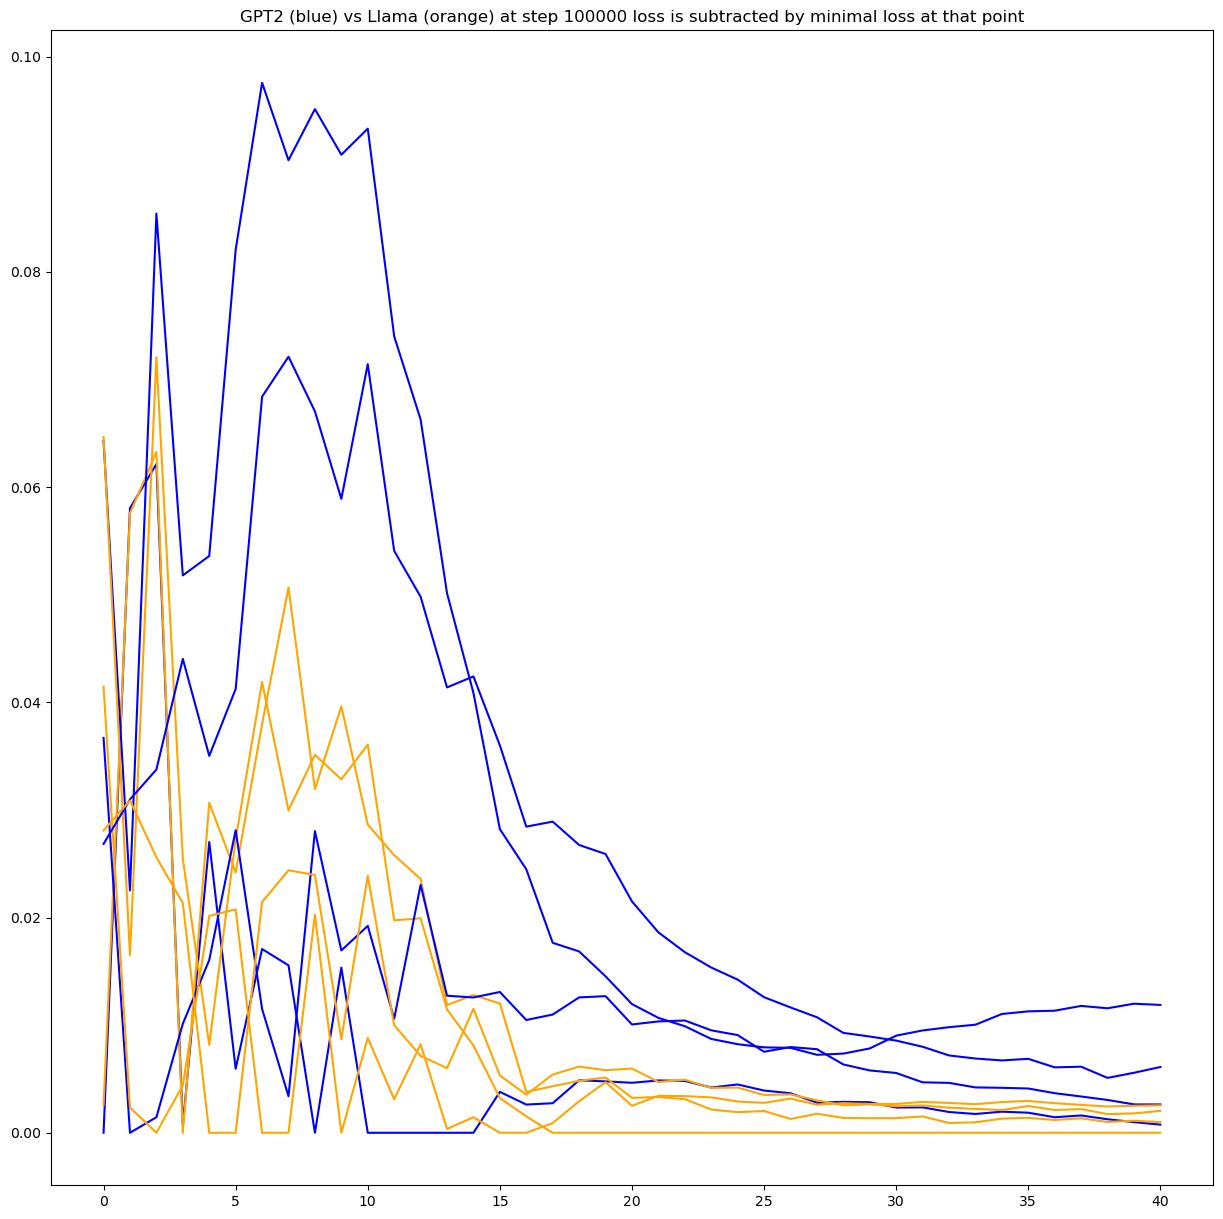

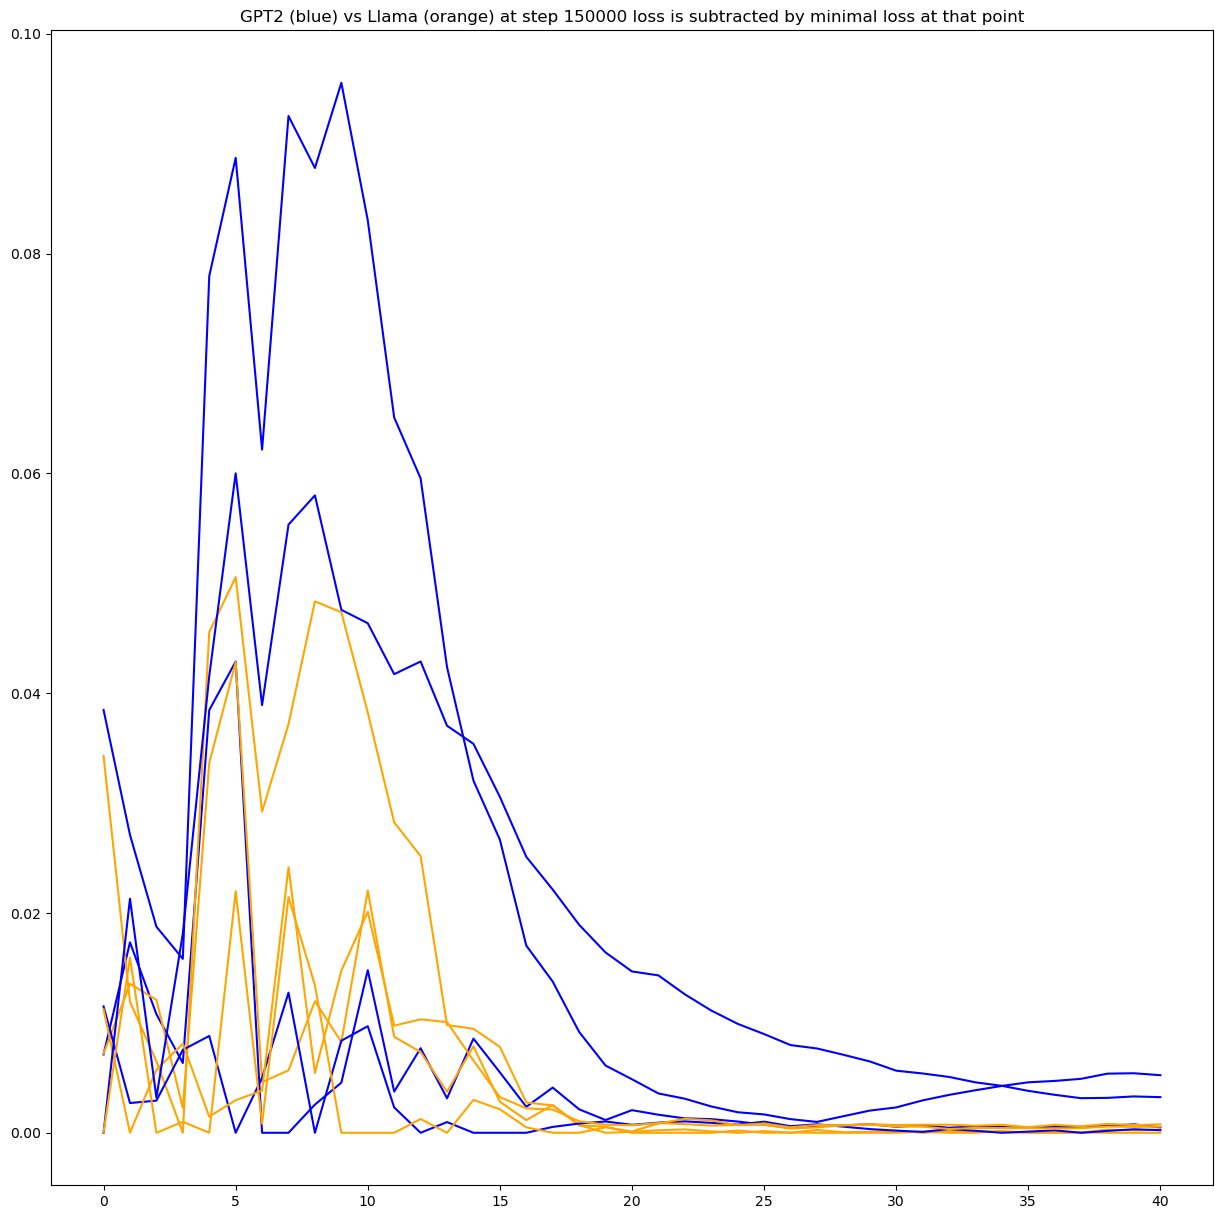

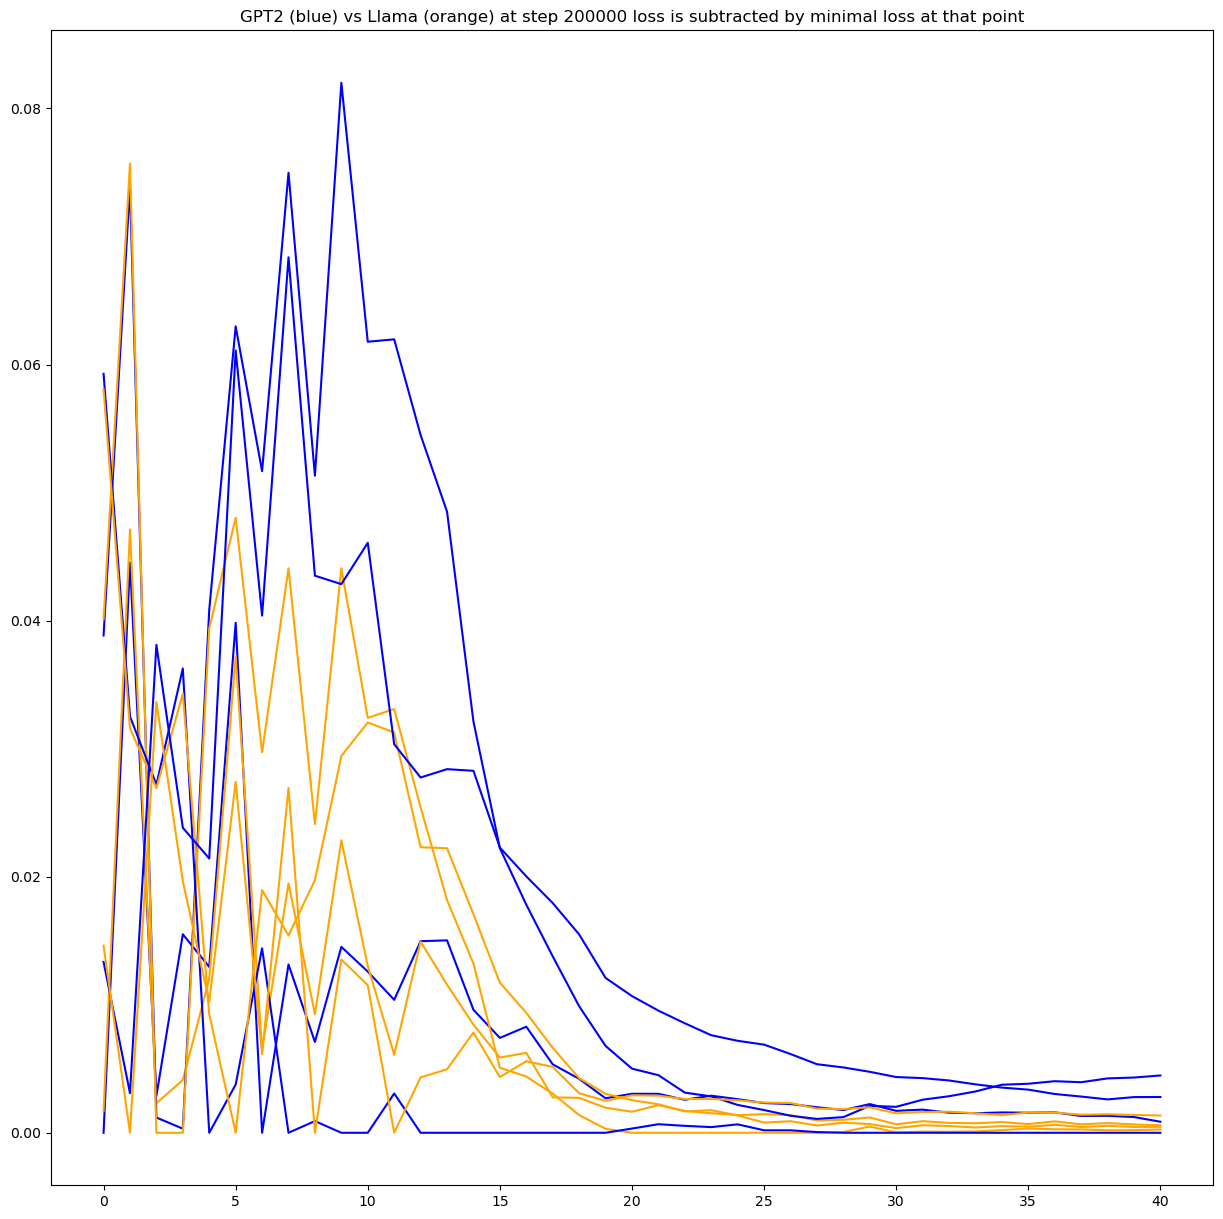

In [18]:
for size in [50_000, 100_000, 150_000, 200_000]:
    plt.figure(figsize=(15, 15))
    models1=[]
    models2=[]
    for i in range(8, 12):
        Model1=load_model("stored_models/Sparse_linear/gpt2/checkpoint_"+str(size)+ " ("+str(i+4)+")", GPT2(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8))
        Model2=load_model("stored_models/Sparse_linear/Llama/checkpoint_"+str(size)+" ("+str(i)+")", Llama(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8))
        MODELS=[Model1.cuda(), Model2.cuda()]
        Model1=None
        Model2=None
        errs = bench.evaluate(MODELS, num_batches=128)
        values=post_process(errs)
        models1.append(values[0]["mean"])
        models2.append(values[1]["mean"])
    minimum=torch.min(torch.stack(models1+models2), dim=0)[0]

    for i in range(4):
        plt.plot(models1[i]-minimum, color="blue")
        plt.plot(models2[i]-minimum, color="orange")

    plt.title("GPT2 (blue) vs Llama (orange) at step "+str(size) + " loss is subtracted by minimal loss at that point")
    plt.show()    

100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


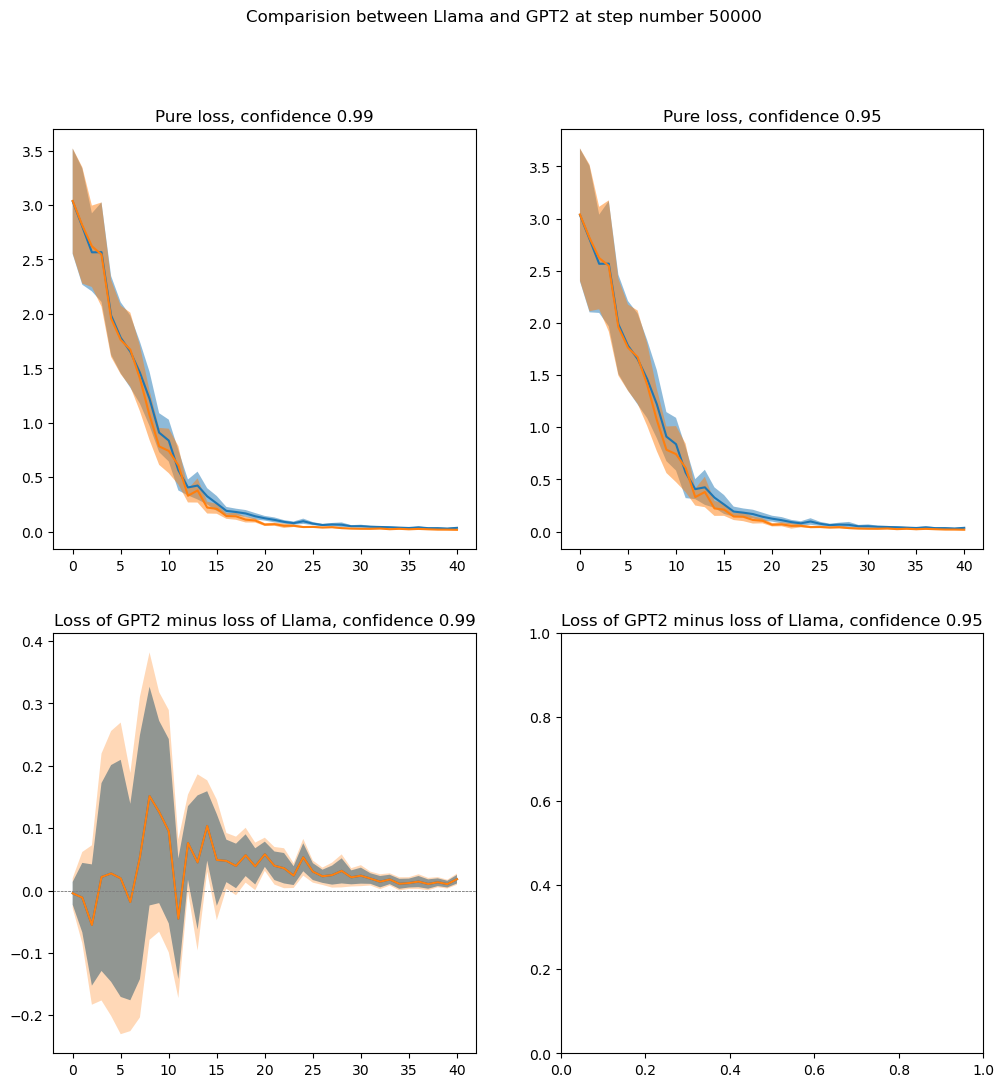

KeyboardInterrupt: 

In [18]:
for size in [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]:
    MODELS=[]

    Model1=load_model("stored_models/Sparse_linear/gpt2/checkpoint_"+str(size)+ " (3)", GPT2(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8))
    Model2=load_model("stored_models/Sparse_linear/Llama/checkpoint_"+str(size)+" (2)", Llama(x_dim=20, n_positions=101,  n_embd=256, n_layer=12, n_head=8))
    MODELS=[Model1.cuda(), Model2.cuda()]
    Model1=None
    Model2=None
    errs = average_evals(MODELS, bench, 2, 2)#bench.evaluate(MODELS, num_batches=64, perfect_model=LeastSquaresModel(x_dim=X_DIM))
    plot_comparison_2_models(MODELS, ["GPT2", "Llama"], errs, title=f"Comparision between Llama and GPT2 at step number {size}")

In [ ]:
errs = bench.evaluate(MODELS, num_batches=4)
values = list(post_process(errs))

dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'confidence_0.01_upper', 'confidence_0.01_lower', 'confidence_0.05_upper', 'confidence_0.05_lower', 'quantile_0.05', 'quantile_0.25', 'quantile_0.5', 'quantile_0.75', 'quantile_0.95'])
dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'confidence_0.01_upper', 'confidence_0.01_lower', 'confidence_0.05_upper', 'confidence_0.05_lower', 'quantile_0.05', 'quantile_0.25', 'quantile_0.5', 'quantile_0.75', 'quantile_0.95'])


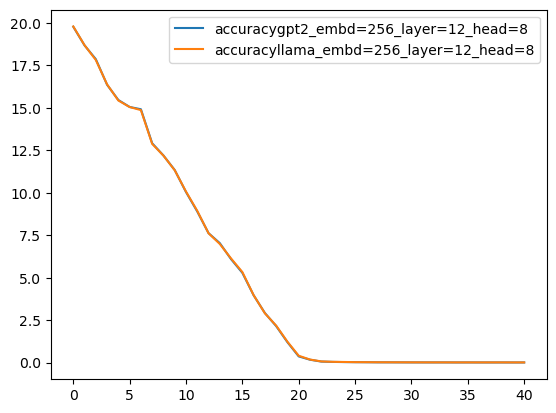

In [ ]:
for model, results in zip(MODELS, values):
    print(results.keys())
    plt.plot(results["accuracy"][:, 0], label=model.name)
plt.legend()
plt.show()

In [ ]:
scaled_x_fcs = [
    ScaledXRegression(scale, base_fc)
    for scale in SCALES
]
scaled_in_benches = [FunctionClassError(METRIC, function_class=fc) for fc in scaled_x_fcs]

scaled_y_fcs = [
    ScaledYRegression(scale, base_fc)
    for scale in SCALES
]
scaled_out_benches = [FunctionClassError(METRIC, function_class=fc) for fc in scaled_y_fcs]

noisy_x_fcs = [
    NoisyXRegression(
        MultivariateNormal(
            torch.zeros(X_SHAPE), 
            noise_level * torch.eye(X_DIM)
        ),
        base_fc 
    )
    for noise_level in NOISE_LEVELS
]
noise_in_benches = [FunctionClassError(METRIC, function_class=fc) for fc in noisy_x_fcs]

noisy_y_fcs = [
    NoisyYRegression(
        MultivariateNormal(
            torch.zeros(Y_SHAPE), 
            noise_level * torch.eye(Y_DIM)
        ),
        base_fc 
    )
    for noise_level in NOISE_LEVELS
]
noise_out_benches = [FunctionClassError(METRIC, function_class=fc) for fc in noisy_y_fcs]

In [ ]:
for b in scaled_in_benches:
    errs = b.evaluate(MODELS, num_batches=4)
    values = list(post_process(errs))
    for model, results in zip(MODELS, values):
        plt.title(f"Errors for X scaled by {b.fn_cls._scale}")  # pyright: ignore[reportAttributeAccessIssue]
        plt.plot(results["accuracy"][:, 0], label="accuracy")
        plt.plot(results["confidence_0.99_upper"][:, 0])
        plt.plot(results["confidence_0.99_lower"][:, 0])
        plt.legend()
        plt.show()
        break

AttributeError: 'FunctionClassError' object has no attribute 'fn_cls'

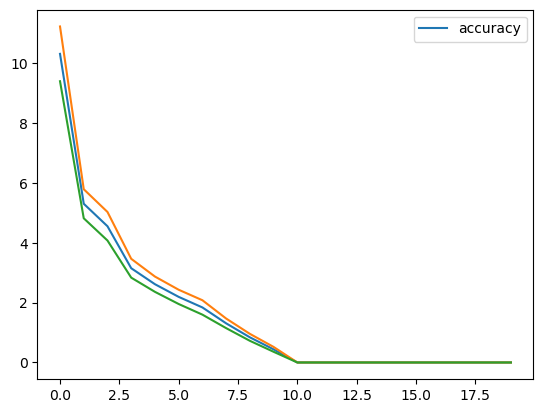

In [ ]:
bench = FCErrorQuadrants(METRIC, base_fc)
errs = bench.evaluate(MODELS, num_batches=4)
values = list(post_process(errs))
for model, results in zip(MODELS, values):
    plt.plot(results["accuracy"][:, 0], label="accuracy")
    plt.plot(results["confidence_0.99_upper"][:, 0])
    plt.plot(results["confidence_0.99_lower"][:, 0])
    plt.legend()
    plt.show()
    break


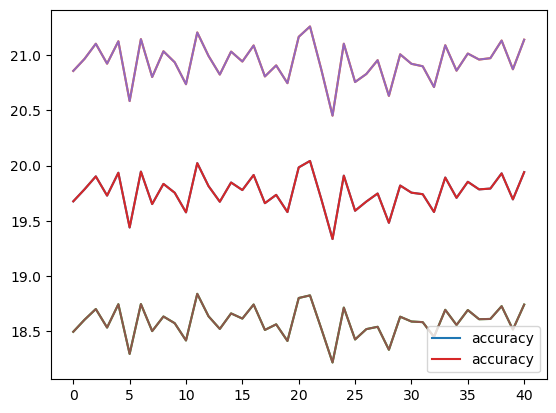

In [9]:
bench = FCErrorOrthogonal(METRIC, base_fc)
errs = bench.evaluate(MODELS, num_batches=32)
values = list(post_process(errs))
for model, results in zip(MODELS, values):
    plt.plot(results["accuracy"][:, 0], label="accuracy")
    plt.plot(results["confidence_0.99_upper"][:, 0])
    plt.plot(results["confidence_0.99_lower"][:, 0])
plt.legend()
plt.show()

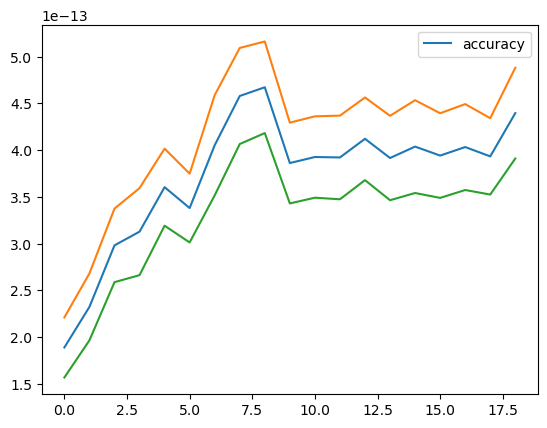

In [ ]:
bench = FCErrorSeenPoints(METRIC, base_fc)
errs = bench.evaluate(MODELS, num_batches=4)
values = list(post_process(errs))
for model, results in zip(MODELS, values):
    plt.plot(results["accuracy"][:, 0], label="accuracy")
    plt.plot(results["confidence_0.99_upper"][:, 0])
    plt.plot(results["confidence_0.99_lower"][:, 0])
    plt.legend()
    plt.show()
    break